In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import tikzplotlib as tpl

# import matplotlib.pylab as pylab
# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}
# pylab.rcParams.update(params)


In [2]:
# df = pd.read_csv('bandit_decision_exp2.csv',  sep = ';', index_col=False)
df = pd.read_csv('bandit_decision_exp1000.csv',  sep = ';', index_col=False)

In [3]:
# print(df)
print(df[(df['batch']=='lin') &(df['bsize']==50)& (df['data']=='Uncalibrated') & (df['fair']=='DP')&(df['beta']==0.1) & (df['alpha'] == 0.25)]['seed'])

Series([], Name: seed, dtype: int64)


In [4]:
experiments = [['Uncalibrated', 'DP'], ['Uncalibrated', 'EO'], ['FICO', 'DP'], ['FICO', 'EO']]
exp = ['Synthetic DP', 'Synthetic EO', 'FICO DP', 'FICO EO']

# fix
beta = 0.1
al = 0.25


# batch = [[none, 1], [exp, 1], [lin, 10], [lin, 50]]
batch = [['lin',10], ['exp', 1]]
# batch = [['lin',50], ['exp', 1]]
# batch = [['exp', 1]]
# batchsize = [10,50]


seed = [1,2,3,4,5,6,7,8,9,10]
# seed = [1, 2, 3]


In [5]:
res={}
i = 0

df = df[(df['beta']==beta) & (df['alpha'] == al)]
# print(df)

for e in experiments:
    bdict = {}

    for b in batch:
        # here put alpha == 0.25 in real experiment
        battype = b[0]
        batsize = b[1]
#         print(b)
        dfe = df[(df['data']==e[0]) & (df['fair']==e[1]) & (df['batch']==battype) & (df['bsize']==batsize)]
#         print(dfe.iloc[:,0:7])
        A = []
        F = []
        for s in seed:

            dfel= dfe[(dfe['seed'] == s)]
            acc = dfel['acc'].values.squeeze()
            dfa = np.fromstring(""+acc, dtype=np.float64, sep=',')
            
            fair = dfel[str(e[1])].values.squeeze()
            dff = np.fromstring(""+fair, dtype=np.float64, sep=',')

            if s == 1 :
                A = dfa
                F = dff

            else:
                A = np.vstack((A,dfa))
                F = np.vstack((F,dff))

       
        meanA = A.mean(axis=0)
        stdevA = A.std(axis=0, dtype = np.float64)
        meanF = F.mean(axis=0)
        stdevF = F.std(axis=0, dtype = np.float64)

        steps = np.fromstring(""+dfe['axis'].iloc[0], dtype=np.int, sep=',')
        
        bdict[str(b[0])+str(b[1])] = [[meanA, stdevA], [meanF, stdevF], steps]

    res[exp[i]] = bdict
    i+=1
    

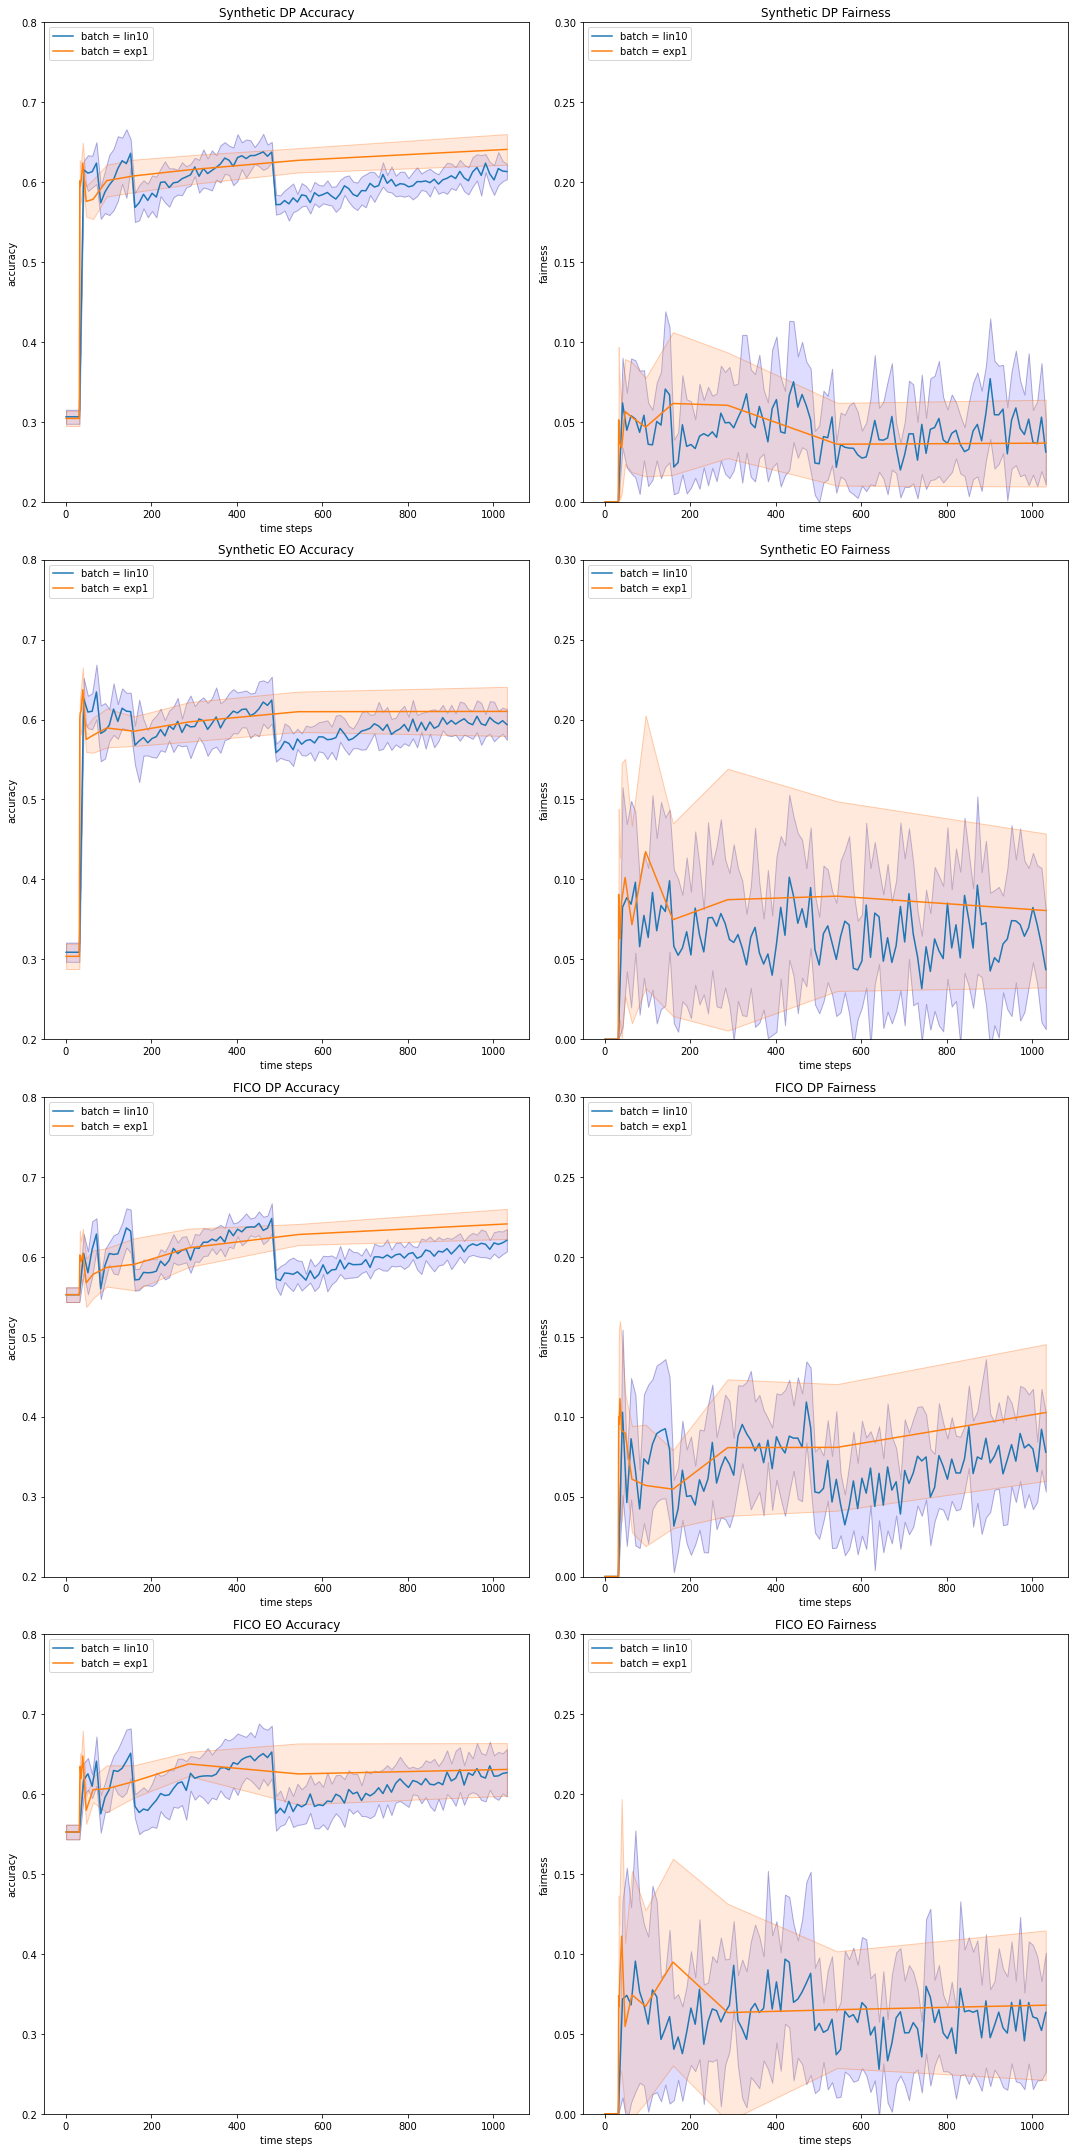

In [6]:
x_label = "time steps"


measure_dict = res
# print(measure_dict)

num_columns = 4
num_rows = 4

figure = plt.figure(tight_layout = True, figsize=(30, 30))
grid = GridSpec(nrows=num_rows, ncols=num_columns, figure=figure)


current_row = 0
columns = [0,1]


for key, value in measure_dict.items():
    
#     axis = figure.add_subplot(grid[current_row, current_column])
    
#     axis,(ax1, ax2) = plt.subplots(1, 2)
#     #     axis.title.set_text(key)
#     axis.suptitle(key)
#     axses = [ax1, ax2]

#     # 0: ACC, 1: Fair
    title = ['Accuracy', 'Fairness']
    ysetting = [[0.2,0.8], [0,0.3]]
    ylabels = ['accuracy', 'fairness']
    for c in columns:
        axis = figure.add_subplot(grid[current_row, c])
        ecolor=['#060080','#ff6503',  '#458B00' ]
        fcolor=['#928CFF','#FFB98C', '#66CD00']
 
        # b = 0.01, 0.1
        i=0
        for b in batch:
            timesteps = value[str(b[0])+str(b[1])][2]
            # value={b : [[A_mean, A_std],[F_mean, F_std], [timesteps]]}
            mean = value[str(b[0])+str(b[1])][c][0]
            stdv = value[str(b[0])+str(b[1])][c][1]
            
            ts = timesteps[0]-1
            timesteps= np.insert(timesteps, 0, range(1,timesteps[0]))
#             print(ts)
#             print(mean)
#             print(mean)
            mean = np.insert(mean, 0, np.ones(ts)*mean[0])
            stdv = np.insert(stdv, 0, np.ones(ts)*stdv[0])
       
            y_TQ = mean+stdv
            y_FQ = mean-stdv
        
            
            
            axis.plot(timesteps, mean, label=('batch = '+str(b[0])+str(b[1])))

            axis.fill_between(timesteps, y_FQ,
                          y_TQ,
                          alpha=0.3,
                          edgecolor=ecolor[i],
                          facecolor=fcolor[i])
            axis.legend(loc='upper left') 
            axis.title.set_text(key+' '+title[c])
            i +=1

        axis.set_ylim(ysetting[c])
        axis.set_ylabel(ylabels[c])
        axis.set_xlabel(x_label)
        axis.set_xscale("linear")
        
    current_row +=1


# plt.show()

# base_save_path = "/Users/mrateike/PycharmProjects/fair_minimonster/final_results"
# file_path = "{}/plot_exp2.png".format(base_save_path)
# plt.savefig(file_path)
# tpl.save(file_path.replace(".png", ".tex"),
#          figure=figure,
#          axis_width='\\figwidth',
#          axis_height='\\figheight',
#          tex_relative_path_to_data='.',
#          extra_groupstyle_parameters={"horizontal sep=1.2cm"})
# plt.close('all')

In [7]:
dfr = pd.read_csv('bandit_regret_exp1000.csv',  sep = ';', index_col=False)
# print(dfr)
# print(dfr[(dfr['batch']=='none') & (dfr['bsize']==1)])

In [8]:
# experiments = [['Uncalibrated', 'DP'], ['Uncalibrated', 'EO'], ['FICO', 'DP'], ['FICO', 'EO']]
# exp = ['UN_DP', 'UN_EO', 'FI_DP', 'FI_EO']

# fix
beta = 0.1
al = 0.25


# batch = [[none, 1], [exp, 1], [lin, 10], [lin, 50]]
# batch = [['lin',50], ['exp', 1]]
batch = [['lin',10], ['exp', 1]]
# batchsize = [10,50]
batchsize = [1]

seed = [1,2,3,4,5,6,7,8,9,10]
# seed = [1,2,3]


In [9]:
regs={}

i = 0


dfr = dfr[(dfr['beta']==beta) & (dfr['alpha'] == al)]
# print(dfr)

for e in experiments:
    bdict = {}

    for b in batch:
        # here put alpha == 0.25 in real experiment
        battype = b[0]
        batsize = b[1]
        
        dfe = dfr[(dfr['data']==e[0]) & (dfr['fair']==e[1]) & (dfr['batch']==battype) & (dfr['bsize']==batsize)]
        A = []
        for s in seed:
            # here, if we select regT we get the other plot
            dfel = dfe[(dfe['seed']==s)]
            reg = dfel['regt'].values.squeeze()
            dfnp = np.fromstring(''+reg, dtype=np.float, sep=',')
            if s == 1 :
                A = dfnp
            else:
                A = np.vstack((A,dfnp))

        mean = A.mean(axis=0)
        stdev = A.std(axis=0, dtype = np.float64)

        bdict[str(b[0])+str(b[1])] = [mean, stdev]
 
    regs[exp[i]] = bdict
    i+=1

# print(reg)

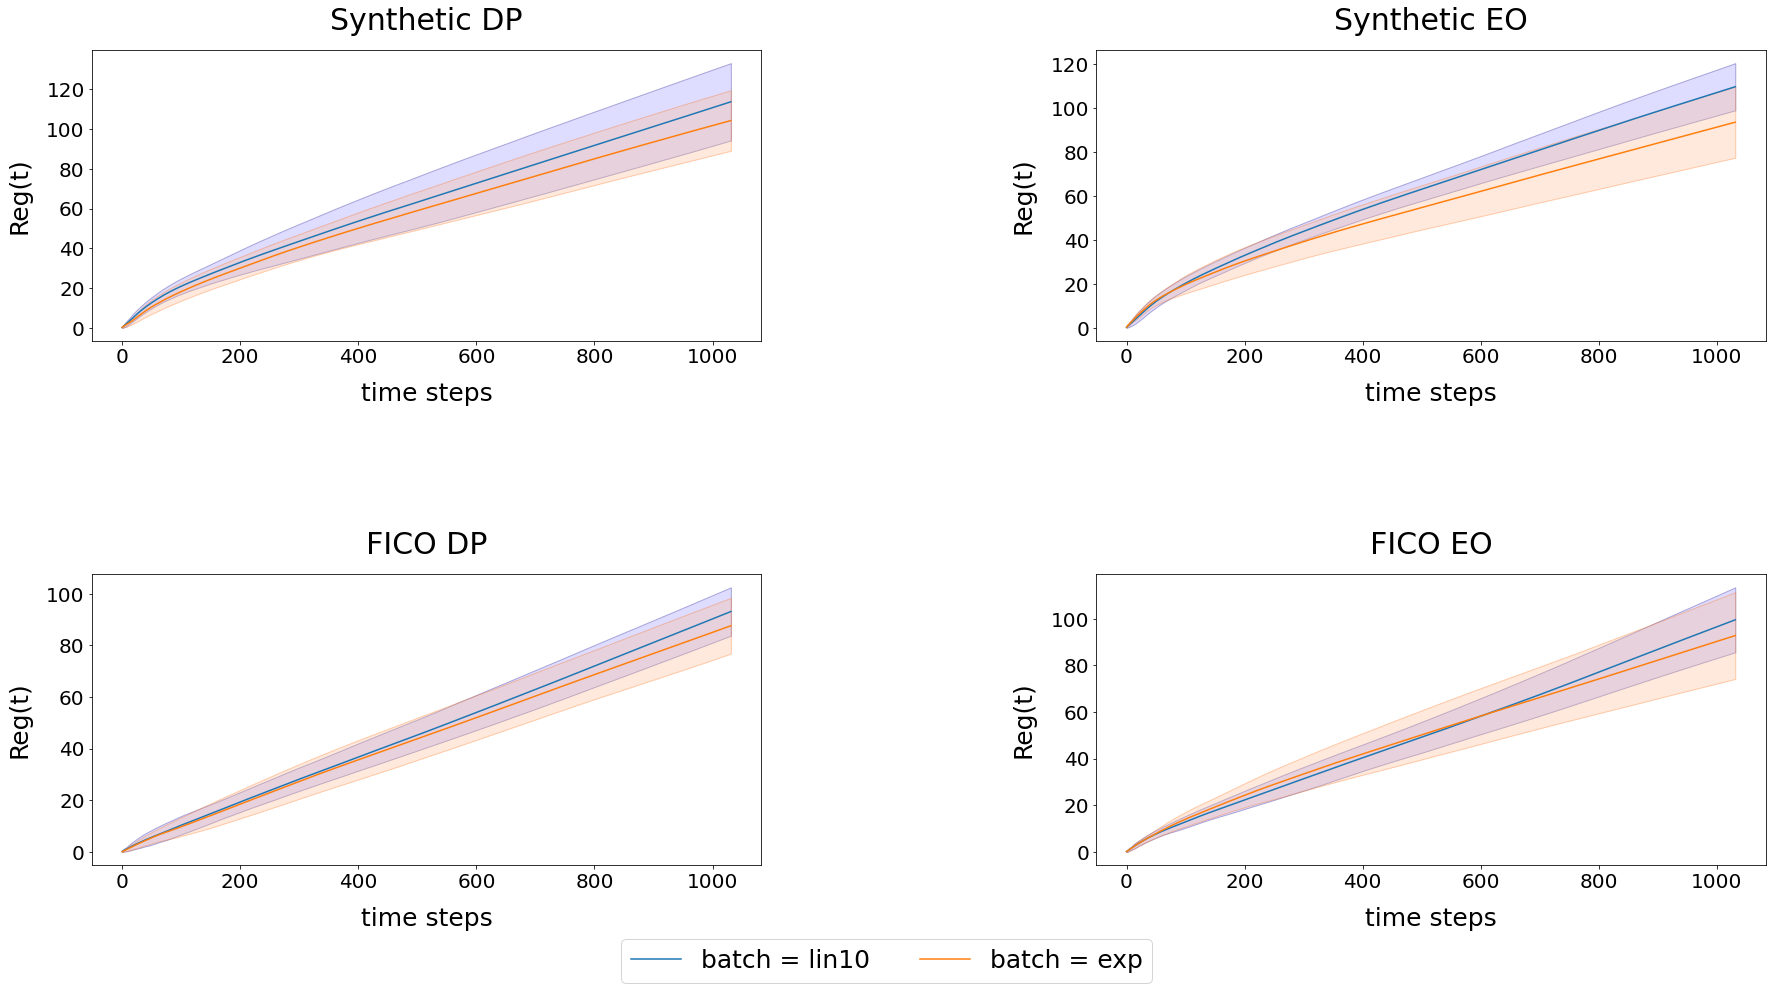

In [10]:
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 

x_label = "time steps"


measure_dict = regs

num_columns = 2
num_rows = 2

figure = plt.figure(figsize=(30, 15))
grid = GridSpec(nrows=num_rows, ncols=num_columns, figure=figure)
grid.update(wspace = 0.5, hspace=0.8)


title = ['ACC', 'FAIR']
ysetting = [[0.2,1], [0,0.8]]
ylabels = ['accuracy', 'fairness']

current_row = 0
current_column = 0
li = 0

for key, value in measure_dict.items():
    
    axis = figure.add_subplot(grid[current_row, current_column])
    
    ecolor=['#060080','#ff6503','#060080']
    fcolor=['#928CFF','#FFB98C','#D3FF8C']
    i = 0
    for b in batch:
        data = value[str(b[0])+str(b[1])]
        # data 0 is mean, data 1 stdv
        timesteps= range(0,len(data[0]))
        
        if str(b[0]) == 'exp':
            labely = 'batch = '+str(b[0])
        else:
            labely = 'batch = '+str(b[0])+str(b[1])
        
        if li < 2:
            axis.plot(timesteps, data[0], label=labely)
        else:
            axis.plot(timesteps, data[0])
        y_TQ = data[0]+data[1]
        y_FQ = data[0]-data[1]
        
        axis.fill_between(timesteps, y_FQ,
                      y_TQ,
                      alpha=0.3,
                      edgecolor=ecolor[i],
                      facecolor=fcolor[i])
        
        
        for tick in axis.xaxis.get_major_ticks():
                tick.label.set_fontsize(20)
        for tick in axis.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
        
        i+=1
        li +=1

    
    axis.set_xlabel(x_label, fontsize=25, labelpad =15)
    axis.set_title(key, fontsize = 30)
    axis.set_xscale("linear")
#     axis.set_ylim(0, 1000)
    axis.set_ylabel('Reg(t)', fontsize=25, labelpad = 15)

#     if plot_dict['evaluation'] == 'YES':
#         if current_column == 0 and current_row == 1:
#             axis.set_ylim(-0.5, 0.5)
#         else:
#             axis.set_ylim(0, 1)

    
    if current_column == 0 and current_row ==0:
        current_column =1
    elif current_column == 1 and current_row ==0:
        current_row =1
        current_column=0
    else:
        current_column = 1
        current_row = 1


# box = figure.get_position()
# figure.set_position([box.x0, box.y0 + box.height * 0.1,
#                  box.width, box.height * 0.9])

# Put a legend below current axis
# figure.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)

# plt.subplots_adjust(right=0.7)
figure.legend(loc='lower center', ncol=3, fontsize=25, frameon = True) 
# plt.tight_layout(rect=[0,0,0.75,1])
base_save_path = "/Users/mrateike/PycharmProjects/fair_minimonster/final_results"
file_path = "{}/plot_exp411.png".format(base_save_path)
figure.savefig(file_path, bbox_inches="tight")
tpl.save(file_path.replace(".png", ".tex"),
         figure=figure,
         axis_width='\\figwidth',
         axis_height='\\figheight',
         tex_relative_path_to_data='.',
         extra_groupstyle_parameters={"horizontal sep=1.2cm"})

plt.show()
plt.close('all')

In [11]:
# from matplotlib import rcParams
# rcParams['axes.titlepad'] = 20 

# x_label = "time steps t"


# measure_dict = res
# # print(measure_dict)

# num_columns = 4
# num_rows = 4

# figure = plt.figure(figsize=(20, 15))
# # grid = GridSpec(nrows=8, ncols=2, figure=figure)

# # gs0 = gridspec.GridSpec(2, 2, figure=f)
# # gs0.update(wspace=0.3, hspace=0.7)


# grid = GridSpec(nrows=2, ncols=2, figure=figure)
# grid.update(wspace=0.5, hspace=0.5)

# rows = [0,1]
# ysetting = [[0.53,0.68], [0,0.15]]

# ic = 0
# li = 0

# ylabels = ['accuracy', 'fairness']
# ecolor=['#060080','#ff6503', '#060080', '#ff938c']
# fcolor=['#928CFF', '#FFB98C','#D3FF8C','#ff938c']
# lcolor = ['C0','C1','C2','C3']
# pos = [71, 1000, 2000, 3000, 4000, 5000]
# posy = [[0.55, 0.60, 0.65],[0.04, 0.08, 0.12]]
# # columnrows = [[0,0], [0,1], [2,0], [2,1]]   
# # columnrows = [[0,0], [0,1], [1,0], [1,1]]   

# for key, value in measure_dict.items():
#     i =0
# #     current_row = columnrows[ic][0]
# #     current_column = columnrows[ic][1]
    
#     if i == 0:
#         gs = GridSpecFromSubplotSpec(2, 1, subplot_spec=grid[ic])
#     else:
#         gs = grid[ic].subgridspec(2, 1)

#     for c in rows: 
# #         axis = figure.add_subplot(grid[current_row, current_column])
#         axis = figure.add_subplot(gs[c, 0])
#         axis.set_yticks(posy[c])
    
#         if c == 0:
#             axis.set_title(key, fontsize = 30)
#         if c ==1 :
#             axis.set_xlabel(x_label, fontsize=25, labelpad=15)
#             axis.set_xscale("linear")
#         for b in beta:
#             timesteps = value[str(b)][2][1:]
#             # value={b : [[A_mean, A_std],[F_mean, F_std], [timesteps]]}
#             mean = value[str(b)][c][0][1:]
#             stdv = value[str(b)][c][1][1:]
       
#             # option 1 : reevaluate with new evaluation (should be 0 fairness for first phase!)
# #             ts = timesteps[0]-1
# #             mean = np.insert(mean, 0, np.ones(ts)*mean[0])
# #             stdv = np.insert(stdv, 0, np.ones(ts)*stdv[0])
       
#             y_TQ = mean+stdv
#             y_FQ = mean-stdv
        
# #             timesteps= np.insert(timesteps, 0, range(1,timesteps[0]))
#             if ic == 0:
#                 axis.plot(timesteps, mean, color = lcolor[i], label=(ylabels[c] +' \u03B2 = '+str(b)))
                
#             else:
#                 axis.plot(timesteps, mean, color = lcolor[i])
                
                
#             axis.fill_between(timesteps, y_FQ,
#                           y_TQ,
#                           alpha=0.3,
#                           edgecolor=ecolor[i],
#                           facecolor=fcolor[i])
            
#             for tick in axis.xaxis.get_major_ticks():
#                 tick.label.set_fontsize(20)
#             for tick in axis.yaxis.get_major_ticks():
#                 tick.label.set_fontsize(20) 
            
#             axis.set_xticks(pos)
            
#             if c == 0:
#                 axis.set_ylabel(ylabels[c], fontsize=25, labelpad=15)
#             else:
#                 axis.set_ylabel(ylabels[c] + " (" + str(experiments[ic][1] + ")"), fontsize=25, labelpad=15)
#             axis.set_ylim(ysetting[c])
            
#             i +=1
#         current_row +=1
# #         axis.set_xlim((71, 5071))
            
#     ic +=1
    
# figure.legend(loc='lower center', ncol=4, fontsize=25, frameon = True)    


# # base_save_path = "/Users/mrateike/PycharmProjects/fair_minimonster/final_results"
# # file_path = "{}/plot_exp42.png".format(base_save_path)
# # plt.savefig(file_path)
# # tpl.save(file_path.replace(".png", ".tex"),
# #          figure=figure,
# #          axis_width='\\figwidth',
# #          axis_height='\\figheight',
# #          tex_relative_path_to_data='.',
# #          extra_groupstyle_parameters={"horizontal sep=1.2cm"})


# plt.show()
# plt.close('all')

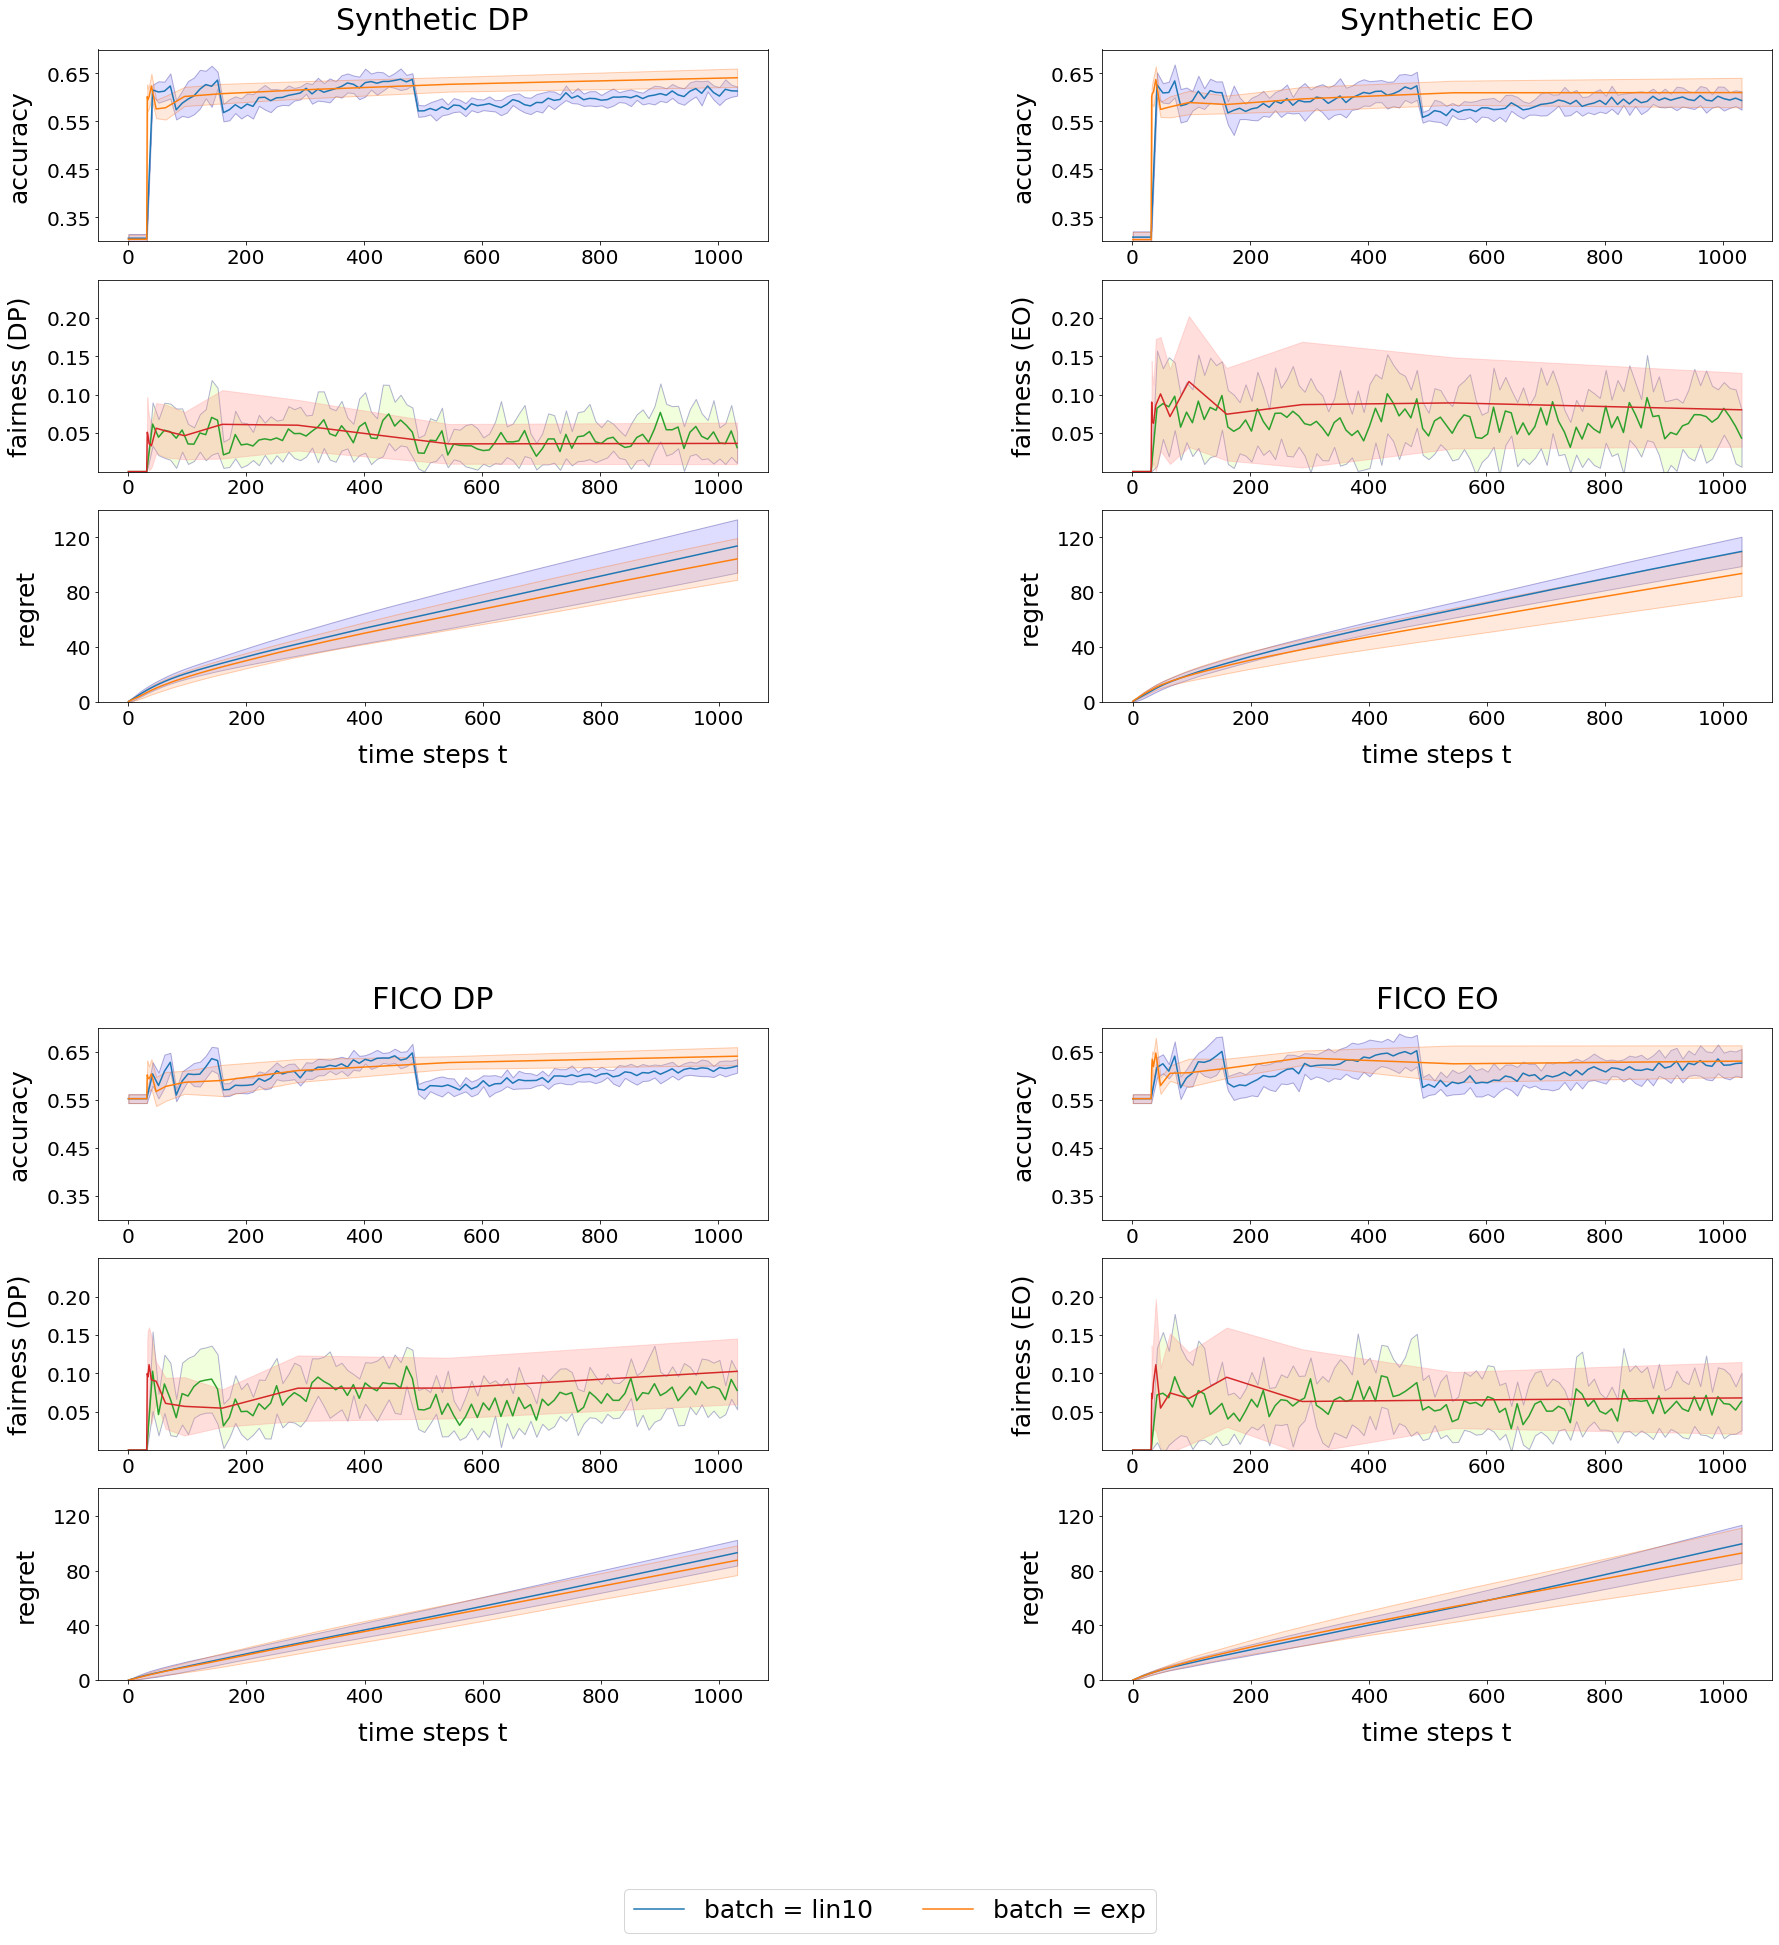

In [12]:
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 

x_label = "time steps t"


# measure_dict = res
# print(measure_dict)

num_columns = 4
num_rows = 4

figure = plt.figure(figsize=(30, 30))
# grid = GridSpec(nrows=8, ncols=2, figure=figure)

# gs0 = gridspec.GridSpec(2, 2, figure=f)
# gs0.update(wspace=0.3, hspace=0.7)


grid = GridSpec(nrows=2, ncols=2, figure=figure)
grid.update(wspace=0.5, hspace=0.5)

rows = [0,1,2]


ic = 0
li = 0

ylabels = ['accuracy', 'fairness', 'regret']
ecolor=['#060080','#ff6503', '#060080', '#ff938c','#060080','#ff6503' ]
fcolor=['#928CFF', '#FFB98C','#D3FF8C','#ff938c','#928CFF', '#FFB98C' ]
lcolor = ['C0','C1','C2','C3', 'C0','C1']
# pos = [0, 1000, 2000, 3000, 4000, 5000]

# # Forr 1000
pos = [0, 200, 400, 600, 800, 1000]
posy = [[0.35, 0.45, 0.55, 0.65],[0.05, 0.10, 0.15, 0.2], [0, 40, 80, 120]]
ysetting = [[0.3,0.7], [0,0.25], [0, 140]]

# Forr 5000
# pos = [0, 1000, 2000, 3000, 4000, 5000]
# posy = [[0.35, 0.45, 0.55, 0.65],[0.05, 0.10, 0.15], [0, 200, 400, 600]]
# ysetting = [[0.3,0.7], [0,0.15], [0, 600]]


# columnrows = [[0,0], [0,1], [2,0], [2,1]]   
# columnrows = [[0,0], [0,1], [1,0], [1,1]]   

for key, value in res.items():
    i =0
#     current_row = columnrows[ic][0]
#     current_column = columnrows[ic][1]
    
    if i == 0:
        gs = GridSpecFromSubplotSpec(3, 1, subplot_spec=grid[ic])
    else:
        gs = grid[ic].subgridspec(3, 1)

    for c in rows: 
#         axis = figure.add_subplot(grid[current_row, current_column])
        axis = figure.add_subplot(gs[c, 0])
        axis.set_yticks(posy[c])
    
        if c == 0:
            axis.set_title(key, fontsize = 30)
        if c ==2 :
            axis.set_xlabel(x_label, fontsize=25, labelpad=15)
            axis.set_xscale("linear")
        
        
        for b in batch:
#             print('c', c, 'b', b)
            if c == 2: 
                value = regs[key]
                data = value[str(b[0])+str(b[1])]
                timesteps= range(0,len(data[0]))
                mean = data[0]
                stdv = data[1]
#               
  
            else: 
                timesteps = value[str(b[0])+str(b[1])][2]
            # value={b : [[A_mean, A_std],[F_mean, F_std], [timesteps]]}
                mean = value[str(b[0])+str(b[1])][c][0]
                stdv = value[str(b[0])+str(b[1])][c][1]
        
                ts = timesteps[0]-1
                timesteps= np.insert(timesteps, 0, range(1,timesteps[0]))
                mean = np.insert(mean, 0, np.ones(ts)*mean[0])
                stdv = np.insert(stdv, 0, np.ones(ts)*stdv[0])
                
                if str(b[0]) == 'exp':
                    labely = 'batch = '+str(b[0])
                else:
                    labely = 'batch = '+str(b[0])+str(b[1])

            y_TQ = mean+stdv
            y_FQ = mean-stdv
        
#             timesteps= np.insert(timesteps, 0, range(1,timesteps[0]))
#             print(timesteps)
#             print(mean)
            if li <2:
                axis.plot(timesteps, mean, color = lcolor[i], label=labely)

            else:
                axis.plot(timesteps, mean, color = lcolor[i])
                
                
            axis.fill_between(timesteps, y_FQ,
                          y_TQ,
                          alpha=0.3,
                          edgecolor=ecolor[i],
                          facecolor=fcolor[i])
            
            for tick in axis.xaxis.get_major_ticks():
                tick.label.set_fontsize(20)
            for tick in axis.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
            
            axis.set_xticks(pos)
            
            
            if c ==1:
                axis.set_ylabel(ylabels[c] + " (" + str(experiments[ic][1] + ")"), fontsize=25, labelpad=15)
            else:
                axis.set_ylabel(ylabels[c], fontsize=25, labelpad=15)
            axis.set_ylim(ysetting[c])
            li+=1
            i +=1
        current_row +=1
#         axis.set_xlim((71, 5071))
            
    ic +=1
    
figure.legend(loc='lower center', ncol=4, fontsize=25, frameon = True)    


base_save_path = "/Users/mrateike/PycharmProjects/fair_minimonster/final_results"
file_path = "{}/plot_exp412.png".format(base_save_path)
plt.savefig(file_path)
tpl.save(file_path.replace(".png", ".tex"),
         figure=figure,
         axis_width='\\figwidth',
         axis_height='\\figheight',
         tex_relative_path_to_data='.',
         extra_groupstyle_parameters={"horizontal sep=1.2cm"})


plt.show()
plt.close('all')